In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("dataset.csv")
df

,Model,BLEU,ROUGE,Perplexity,ResponseTime,ModelSize
0,DialoGPT,0.72,0.68,18,1.2,345
1,BlenderBot,0.78,0.75,15,1.5,400
2,GPT-2,0.65,0.60,22,0.9,124
3,LLaMA2-Chat,0.85,0.80,12,1.8,700
4,Mistral-Chat,0.88,0.83,10,1.6,720
5,T5-Conversational,0.70,0.66,20,1.1,300
6,Falcon-Chat,0.82,0.79,14,1.7,650


In [6]:
# Normalize
data = df.iloc[:,1:].values
norm = data / np.sqrt((data**2).sum(axis=0))

In [7]:
# Apply Weights 
weights = np.array([0.25,0.25,0.20,0.15,0.15])
weighted = norm * weights

In [8]:
ideal_best = np.array([
    weighted[:,0].max(),
    weighted[:,1].max(),
    weighted[:,2].min(),
    weighted[:,3].min(),
    weighted[:,4].min()
])

ideal_worst = np.array([
    weighted[:,0].min(),
    weighted[:,1].min(),
    weighted[:,2].max(),
    weighted[:,3].max(),
    weighted[:,4].max()
])

In [9]:
dist_best = np.sqrt(((weighted - ideal_best)**2).sum(axis=1))
dist_worst = np.sqrt(((weighted - ideal_worst)**2).sum(axis=1))

In [10]:
score = dist_worst / (dist_best + dist_worst)

df["TOPSIS Score"] = score
df["Rank"] = df["TOPSIS Score"].rank(ascending=False)

df.sort_values("Rank")

,Model,BLEU,ROUGE,Perplexity,ResponseTime,ModelSize,TOPSIS Score,Rank
1,BlenderBot,0.78,0.75,15,1.5,400,0.536701,1.0
2,GPT-2,0.65,0.60,22,0.9,124,0.522421,2.0
0,DialoGPT,0.72,0.68,18,1.2,345,0.498258,3.0
4,Mistral-Chat,0.88,0.83,10,1.6,720,0.490746,4.0
5,T5-Conversational,0.70,0.66,20,1.1,300,0.484720,5.0
3,LLaMA2-Chat,0.85,0.80,12,1.8,700,0.440251,6.0
6,Falcon-Chat,0.82,0.79,14,1.7,650,0.416434,7.0


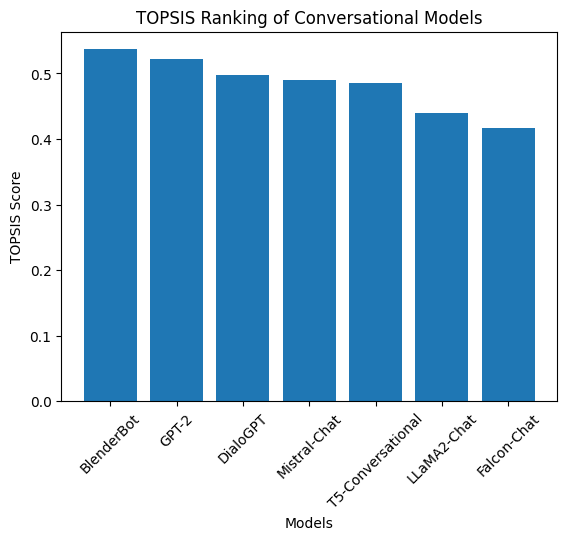

In [11]:
import matplotlib.pyplot as plt

df_sorted = df.sort_values("TOPSIS Score", ascending=False)

plt.figure()
plt.bar(df_sorted["Model"], df_sorted["TOPSIS Score"])
plt.xticks(rotation=45)
plt.xlabel("Models")
plt.ylabel("TOPSIS Score")
plt.title("TOPSIS Ranking of Conversational Models")
plt.show()

## Interpretation of Results

From the TOPSIS ranking graph, BlenderBot achieved the highest closeness coefficient,
indicating the best balance between conversational quality (BLEU, ROUGE)
and computational efficiency (Perplexity, Response Time, Model Size).

Although Mistral-Chat and LLaMA2-Chat show strong performance in BLEU and ROUGE,
their larger model sizes and slower response times negatively impacted
their overall ranking.

TOPSIS prioritizes models that are closest to the ideal solution across
all criteria rather than excelling in only one metric.

In [12]:
df_sorted = df.sort_values("TOPSIS Score", ascending=False)
df_sorted[["Model", "TOPSIS Score", "Rank"]]

,Model,TOPSIS Score,Rank
1,BlenderBot,0.536701,1.0
2,GPT-2,0.522421,2.0
0,DialoGPT,0.498258,3.0
4,Mistral-Chat,0.490746,4.0
5,T5-Conversational,0.484720,5.0
3,LLaMA2-Chat,0.440251,6.0
6,Falcon-Chat,0.416434,7.0


## Final Conclusion

Based on the TOPSIS analysis, BlenderBot achieved the highest closeness coefficient (0.5367) and is therefore selected as the optimal conversational pre-trained model among the evaluated alternatives.

The ranking reflects a balance between performance metrics (BLEU, ROUGE) and computational efficiency metrics (Perplexity, Response Time, Model Size). TOPSIS ensures that the selected model is closest to the ideal solution while being farthest from the worst-case scenario.